In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

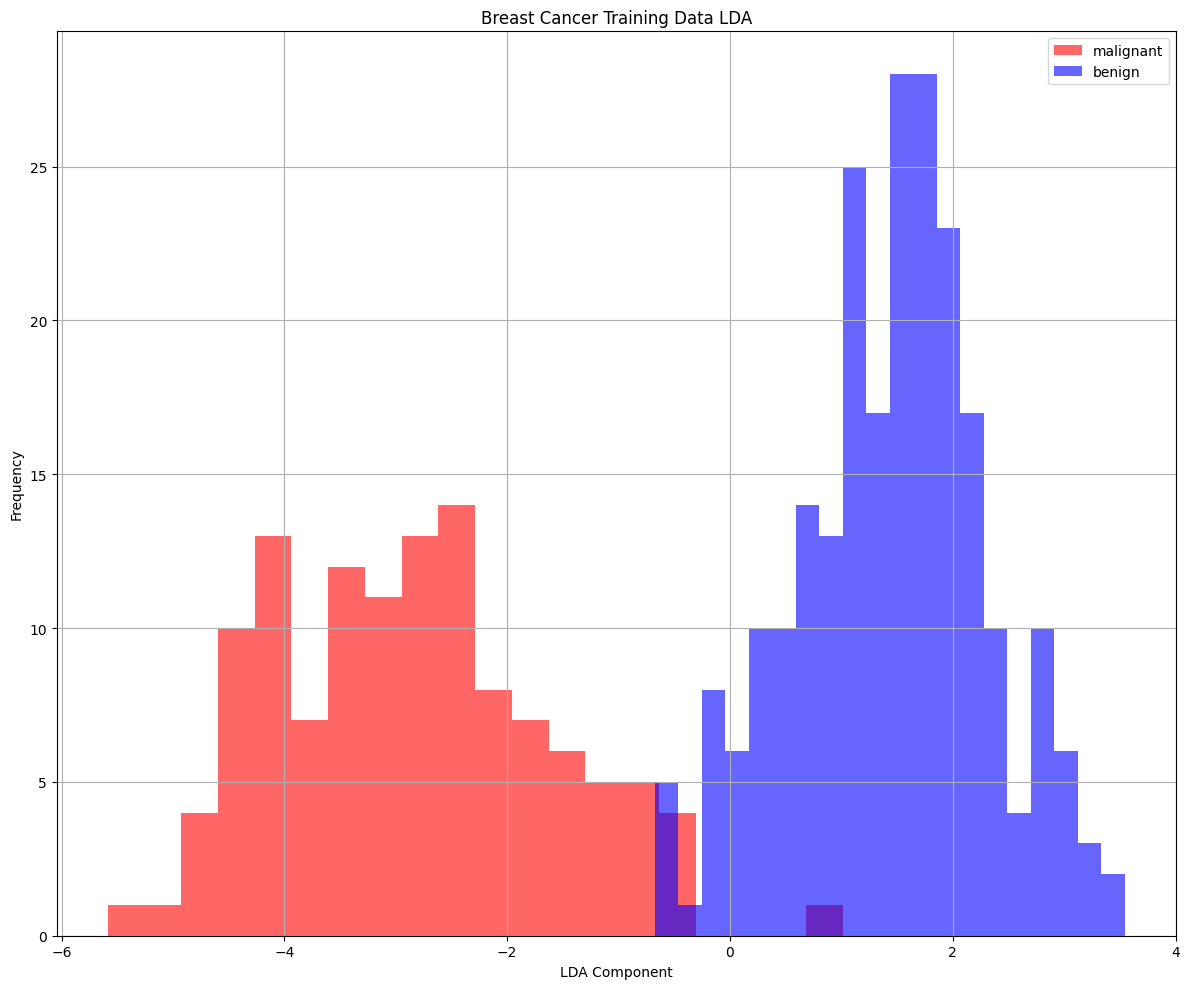

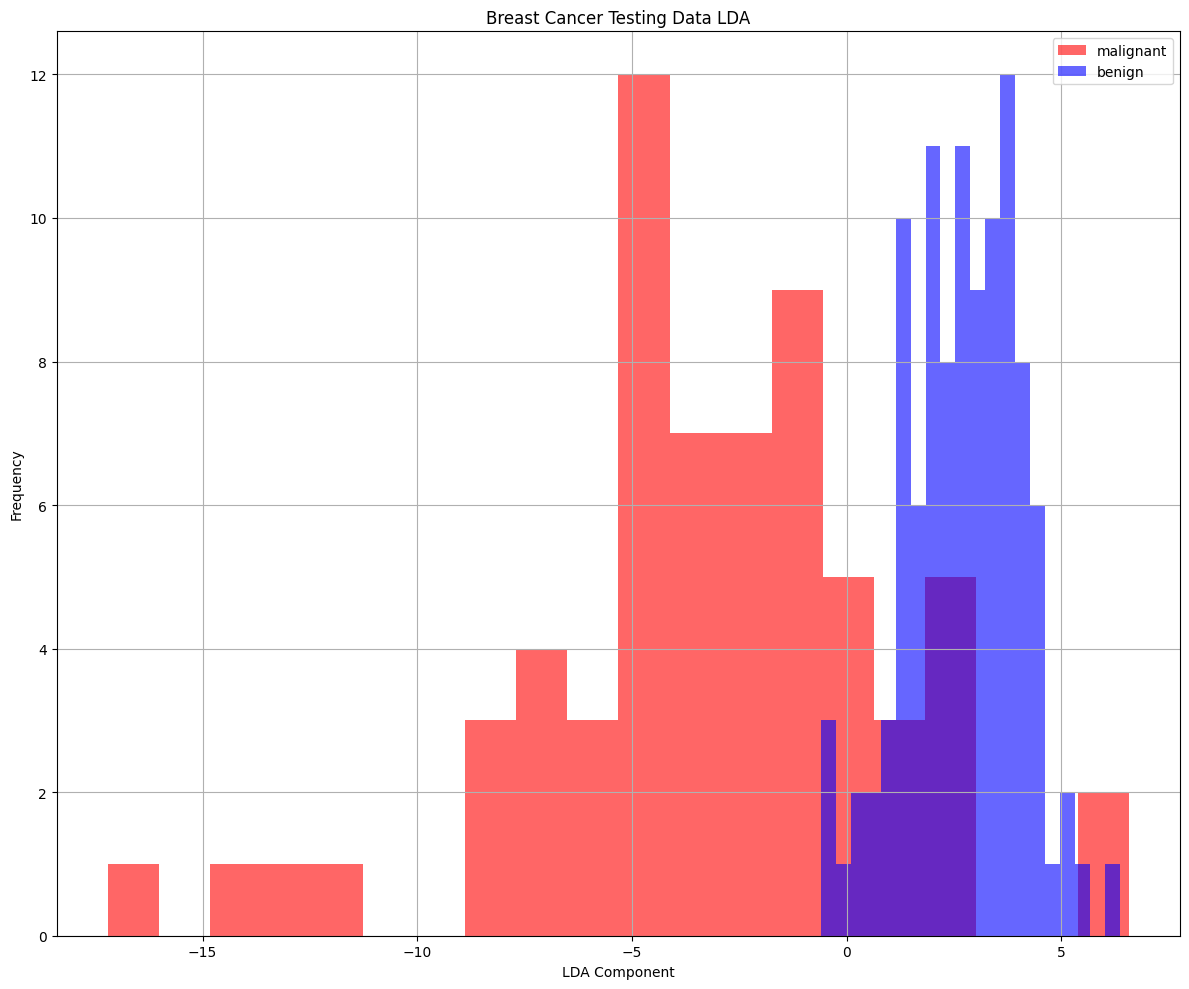

[I 2025-04-27 10:42:09,467] A new study created in memory with name: no-name-2bef9377-e580-46b1-9d28-5cc412bb98c8
[I 2025-04-27 10:42:12,830] Trial 0 finished with value: 0.9724124809741248 and parameters: {'n_estimators': 941, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9724124809741248.
[I 2025-04-27 10:42:15,260] Trial 1 finished with value: 0.9779299847792998 and parameters: {'n_estimators': 669, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.9779299847792998.
[I 2025-04-27 10:42:18,206] Trial 2 finished with value: 0.9778919330289193 and parameters: {'n_estimators': 809, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9779299847792998.
[I 2025-04-27 10:42:18,770] Trial 3 finished with value: 0.9751141552511415 and parameters: {'n_estimators': 132, 'max_depth': 24, 'min_samples_split': 16, 'min_samples_leaf': 7}. Best is trial 1 with v

Best trial:
Accuracy: 0.9833713850837139
Best hyperparameters:  {'n_estimators': 416, 'max_depth': 32, 'min_samples_split': 11, 'min_samples_leaf': 18}


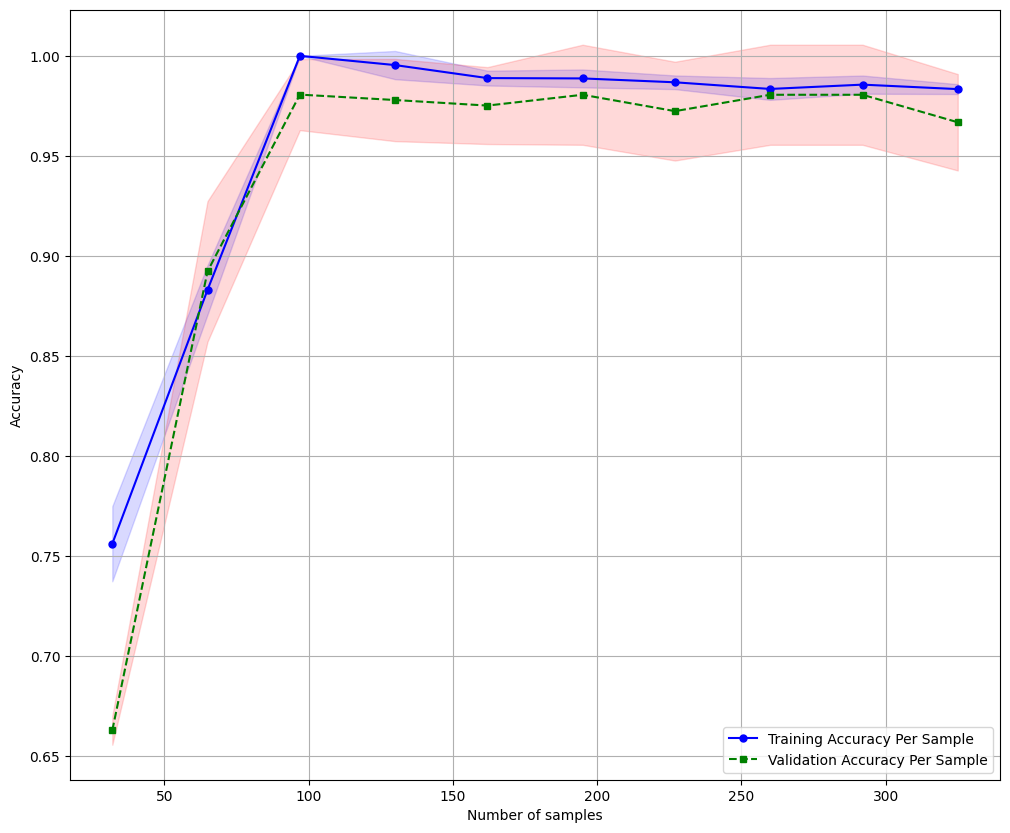

Confusion Matrix
[[ 49  15]
 [  1 106]]
Accuracy: 0.9064, Precision: 0.8760, Recall: 0.9907, F1: 0.9298, AUC: 0.9257


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)